<div style="max-width:66ch;">

# Lecture notes - Random forest

This is the lecture note for **random forest**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to random forest. I encourage you to read further about random forests. </p>

Read more:

- [RandomForestRegressor - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [RandomForestClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Tune hyperparameters - towardsdatascience](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)
- [Random forest - wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)

</div>


<div style="max-width:66ch;">

## Bagging 
- In general for independent observations $Z_1, \ldots, Z_n$ with variance $\sigma^2$ each. Mean of the observations is $\bar{Z} = \frac{\sigma^2}{n}$. So by averaging set of observation we reduce the variance.
- we do this by bagging - bootstrap aggregation. We sample multiple times from a training set and average over all the predictions.
- For classification trees we use the majority vote among all the predictions by the bootstrapped trees

## Random forest
- grow many decision trees on bootstrapped samples
- randomly choose $m \approx \sqrt{p}$ predictors/features as split candidates
- choose one of these $m$ features for the split
- new $m$ features are chosen for each split

</div>

In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("../data/Heart.csv", index_col = 0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<Axes: xlabel='AHD', ylabel='count'>

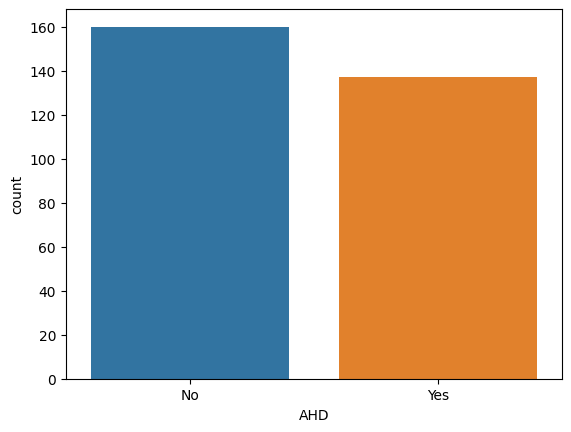

In [5]:
df.dropna(inplace=True)

sns.countplot(data = df, x = "AHD", hue="AHD")

In [6]:
df_dummies = pd.get_dummies(df, drop_first=True)
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [7]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True])

<div style="max-width:66ch;">

## Evaluation

</div>

              precision    recall  f1-score   support

       False       0.94      0.89      0.91        36
        True       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



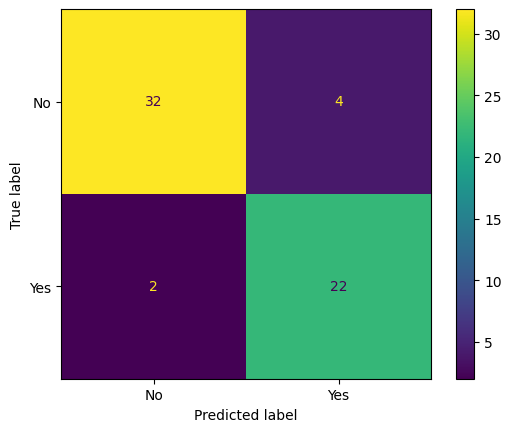

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test, y_pred)

In [10]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
        0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
        0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
        0.06320981]),
 0.9999999999999999)

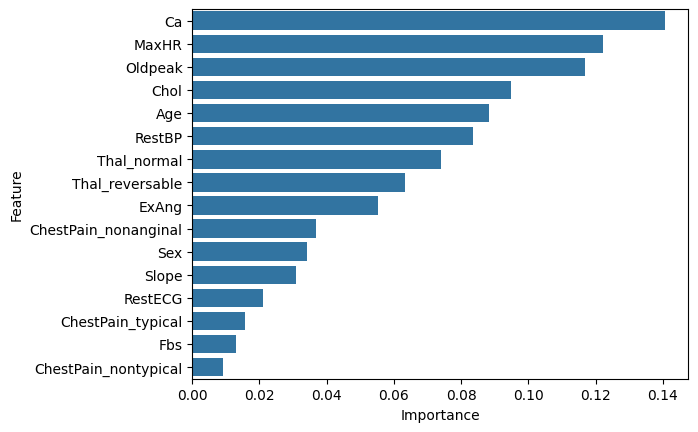

In [11]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)
sns.barplot(data = feature_importance, x = "Importance", y = "Feature");

<div style="max-width:66ch;">

## Summary

In this lecture we've covered random forest, which together with XGBoost are extremely strong algorithms for tabular data, and in many times the state of the art algorithms for tabular data, both for regression and classification. Note that you should hyperparameter tune the algorithms.

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
